# Emotional recognition in photo with convolutional neural networks

The aim of the project is to create a convolutional neural network that will be able to recognize emotions in photos with human faces. Face recognition is used in many systems, such as human-computer interactions and in security systems. Non-verbal signals, such like facial expressions and showing emotions are important forms of interpersonal communication

A convolution is a mathematical transformation defined for two functions (or the signals they describe) resulting in another that can be viewed as a modified version of the original functions.

Convolutional neural networks help to deal with the problem of scalability of input data in ordinary Multilayer Perceptrons (MLP for short). In image processing, the problem is quite common, for example, for a relatively small image with dimensions of 200px by 200px, each hidden layer neuron would have as much as 40,000. wt.

A CNN network, like standard neural networks, consists of an input layer, a (many) hidden layer, and an output layer. The most important in this type of networks are the hidden layers, and they include convolutional, pooling and full layers.

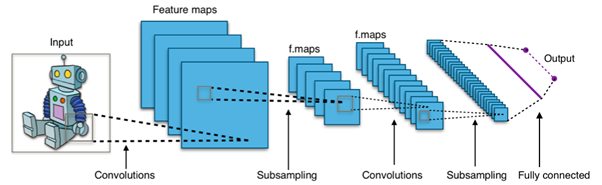

The database contains 213 photos of 7 classes of facial expressions (6 basic emotions + 1 neutral) presented by 10 Japanese models. Three photos of each facial expression were taken for each model.

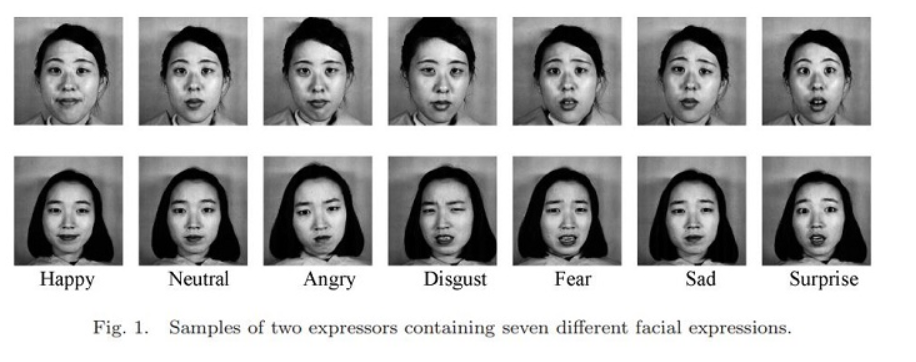

In [1]:
import numpy as np
import os
import cv2
import keras
import tensorflow as tf
from keras import callbacks

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#Data Downloading
#Define Datapath 
data_path = './jaffe/'
data_dir_list = os.listdir(data_path)

# originally the photos have size: 256x256
img_rows=256
img_cols=256
num_channel=1

num_epoch=10
img_data_list=[]

for dataset in data_dir_list:
    #loading a file 
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    #loading a single image
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #we cut off unnecessary elements of the image (most of the background)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
#normalize data
img_data = img_data/255
img_data.shape

Loaded the images of dataset-DISGUST

Loaded the images of dataset-SURPRISE

Loaded the images of dataset-FEAR

Loaded the images of dataset-SAD

Loaded the images of dataset-HAPPY

Loaded the images of dataset-ANGRY

Loaded the images of dataset-NEUTRAL



(213, 128, 128, 3)

In [3]:
print(img_data)

[[[[0.6509804  0.6509804  0.6509804 ]
   [0.64705884 0.64705884 0.64705884]
   [0.6745098  0.6745098  0.6745098 ]
   ...
   [0.8117647  0.8117647  0.8117647 ]
   [0.7882353  0.7882353  0.7882353 ]
   [0.8039216  0.8039216  0.8039216 ]]

  [[0.62352943 0.62352943 0.62352943]
   [0.64705884 0.64705884 0.64705884]
   [0.67058825 0.67058825 0.67058825]
   ...
   [0.79607844 0.79607844 0.79607844]
   [0.79607844 0.79607844 0.79607844]
   [0.7921569  0.7921569  0.7921569 ]]

  [[0.62352943 0.62352943 0.62352943]
   [0.68235296 0.68235296 0.68235296]
   [0.6862745  0.6862745  0.6862745 ]
   ...
   [0.8        0.8        0.8       ]
   [0.79607844 0.79607844 0.79607844]
   [0.8        0.8        0.8       ]]

  ...

  [[0.41960785 0.41960785 0.41960785]
   [0.41568628 0.41568628 0.41568628]
   [0.3882353  0.3882353  0.3882353 ]
   ...
   [0.65882355 0.65882355 0.65882355]
   [0.65882355 0.65882355 0.65882355]
   [0.65882355 0.65882355 0.65882355]]

  [[0.46666667 0.46666667 0.46666667]
   [0.4

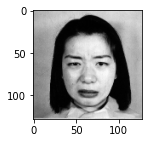

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(2,2))
plt.imshow(img_data[0])
   #single photo - first

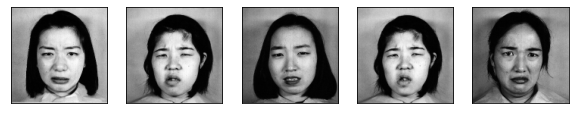

In [5]:
#Displaying 5 images from the collection - Angry emotions
fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i], cmap='bone')

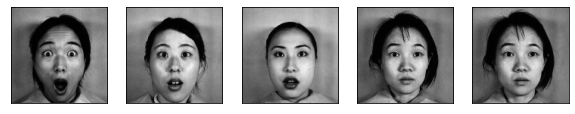

In [6]:
#Wyswietlanie 5 obrazow ze zbioru - emocje DISGUST 
fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i+30], cmap='bone')

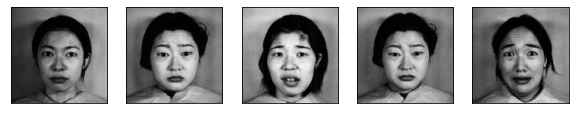

In [7]:
#Displaying 5 images from the collection - FEAR emotions
fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i+60], cmap='bone')

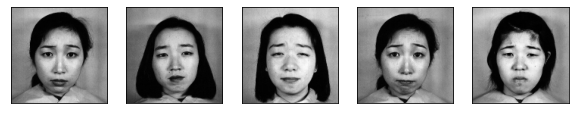

In [8]:
#Displaying 5 images from the collection - HAPPy emotions
fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i+92], cmap='bone')

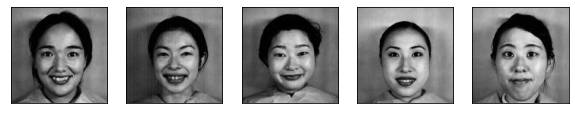

In [9]:
#Displaying 5 images from the collection - NEUTRAL emotions 
fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i+125], cmap='bone')

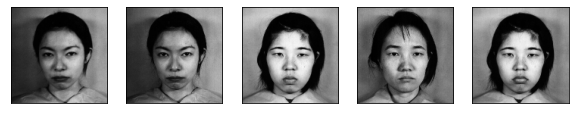

In [10]:
#Displaying 5 images from the collection - SAD emotions
fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i+157], cmap='bone')

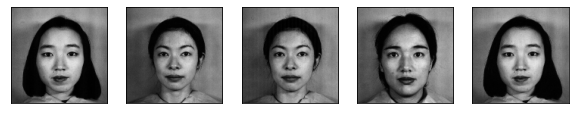

In [11]:
#Displaying 5 images from the collection - SUPRISE emotions 
fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i+188], cmap='bone')

# data augmentation
we double a number of images, flipping it horizontally

In [12]:
### data augmentation

flipped_img_data_list = []
for i in range(len(img_data)):
    flipped = tf.image.flip_left_right(img_data[i])
    flipped_img_data_list.append(flipped)

flipped_img_data = np.array(flipped_img_data_list)
flipped_img_data = img_data.astype('float32')
flipped_img_data.shape

(213, 128, 128, 3)

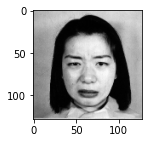

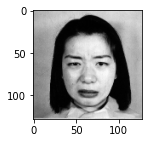

In [65]:
plt.figure(figsize=(2,2))
plt.imshow(img_data[0])

plt.figure(figsize=(2,2))
plt.imshow(flipped_img_data[0])

In [13]:
img_data = np.concatenate([img_data,flipped_img_data])
img_data.shape

(426, 128, 128, 3)

In [14]:
#Assign emotions
#number of types of emotions
num_classes = 7

#number of photos - 213
num_of_samples = img_data.shape[0]

#create tables for emotion numbers - photos will be answered
labels = np.ones((num_of_samples,),dtype='int64')

#assigning "emotion" numbers to the images - the images are loaded sequentially  
labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:212]=6 #30

labels[213:242]=0 #30
labels[243:271]=1 #29
labels[272:303]=2 #32
labels[304:334]=3 #31
labels[335:364]=4 #30
labels[365:395]=5 #31
labels[396:]=6 #30

#Emotions 
names = ['DISGUST','SURPRISE','FEAR','SAD','HAPPY','ANGRY','NEUTRAL']

#function to read what emotions are under the number 
def getLabel(id):
    return ['DISGUST','SURPRISE','FEAR','SAD','HAPPY','ANGRY','NEUTRAL'][id]

In [15]:
######################################################################################################################

In [16]:
#our blackboard with emotions 
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [17]:
labels.shape

(426,)

In [18]:
from keras.utils import np_utils
# convert class labels to on-hot encoding# conve 
Y = np_utils.to_categorical(labels, num_classes)

In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [20]:
#Shuffle the dataset 
x,y = shuffle(img_data,Y, random_state=10)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [21]:
print(X_train.shape)

(362, 128, 128, 3)


In [22]:
print(X_test.shape)

(64, 128, 128, 3)


In [23]:
print(y_train.shape)

(362, 7)


In [24]:
print(y_test.shape)

(64, 7)


In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# model 1

In [26]:
input_shape=img_data[0].shape

filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

#prepare callback for model saving 
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [27]:
#initialize Sequential neural network
model1 = Sequential()
model1.add(Convolution2D(5, (5, 5), strides= (1,1), \
                         input_shape=input_shape, padding='same',\
                         activation='relu'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Convolution2D(15, (5, 5), strides= (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [28]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [29]:
batch_size = 100
epochs = 15
run_hist_model_1 = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/15
4/4 [==============================] - 26s 846ms/step - loss: 2.0672 - accuracy: 0.1327 - val_loss: 1.9817 - val_accuracy: 0.1719
Epoch 2/15
4/4 [==============================] - 2s 373ms/step - loss: 1.9627 - accuracy: 0.1550 - val_loss: 1.9748 - val_accuracy: 0.1406
Epoch 3/15
4/4 [==============================] - 1s 318ms/step - loss: 1.9433 - accuracy: 0.1726 - val_loss: 1.9644 - val_accuracy: 0.1406
Epoch 4/15
4/4 [==============================] - 1s 324ms/step - loss: 1.9425 - accuracy: 0.1613 - val_loss: 1.9506 - val_accuracy: 0.1406
Epoch 5/15
4/4 [==============================] - 2s 420ms/step - loss: 1.9299 - accuracy: 0.1643 - val_loss: 1.9446 - val_accuracy: 0.1406
Epoch 6/15
4/4 [==============================] - 1s 383ms/step - loss: 1.9261 - accuracy: 0.2141 - val_loss: 1.9383 - val_accuracy: 0.1719
Epoch 7/15
4/4 [==============================] - 2s 492ms/step - loss: 1.9211 - accuracy: 0.2301 - val_loss: 1.9321 - val_accuracy: 0.2344
Epoch 8/15
4/4 [===

In [30]:
#sumarize 
model1.summary()
model1.get_config()
model1.layers[0].get_config()
model1.layers[0].input_shape
model1.layers[0].output_shape
model1.layers[0].get_weights()
np.shape(model1.layers[0].get_weights()[0])
model1.layers[0].trainable

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 5)       380       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 15)        1890      
_________________________________________________________________
activation (Activation)      (None, 13, 13, 15)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

True

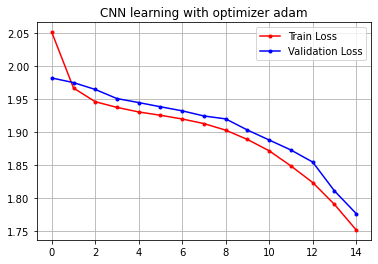

In [31]:
plt.plot(run_hist_model_1.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_model_1.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with optimizer adam")
plt.legend()
plt.grid()

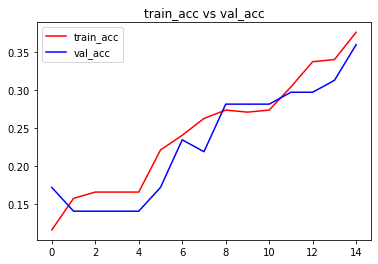

In [32]:
train_acc=run_hist_model_1.history['accuracy']
val_acc=run_hist_model_1.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()

In [33]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.7769817113876343
Test accuracy: 0.359375


# Model 2

In [34]:
model2 = Sequential()
model2.add(Convolution2D(5, (5, 5), strides= (1,1),\
                         input_shape=input_shape,\
                         padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Dropout(0.25))
model2.add(Convolution2D(15, (5, 5), strides= (3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Convolution2D(80, 5, 5))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [35]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [36]:
batch_size = 50
epochs = 20
run_hist_model_2 = model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/20
8/8 [==============================] - 4s 260ms/step - loss: 1.9488 - accuracy: 0.1621 - val_loss: 1.9477 - val_accuracy: 0.0625
Epoch 2/20
8/8 [==============================] - 2s 198ms/step - loss: 1.9464 - accuracy: 0.1284 - val_loss: 1.9461 - val_accuracy: 0.1250
Epoch 3/20
8/8 [==============================] - 2s 200ms/step - loss: 1.9429 - accuracy: 0.1845 - val_loss: 1.9469 - val_accuracy: 0.1719
Epoch 4/20
8/8 [==============================] - 2s 196ms/step - loss: 1.9403 - accuracy: 0.1962 - val_loss: 1.9472 - val_accuracy: 0.2344
Epoch 5/20
8/8 [==============================] - 2s 202ms/step - loss: 1.9406 - accuracy: 0.1410 - val_loss: 1.9446 - val_accuracy: 0.1875
Epoch 6/20
8/8 [==============================] - 2s 206ms/step - loss: 1.9413 - accuracy: 0.1618 - val_loss: 1.9420 - val_accuracy: 0.1250
Epoch 7/20
8/8 [==============================] - 2s 197ms/step - loss: 1.9354 - accuracy: 0.1935 - val_loss: 1.9439 - val_accuracy: 0.1562
Epoch 8/20
8/8 [====

In [37]:
#sumarize 
model2.summary()
model2.get_config()
model2.layers[0].get_config()
model2.layers[0].input_shape
model2.layers[0].output_shape
model2.layers[0].get_weights()
np.shape(model2.layers[0].get_weights()[0])
model2.layers[0].trainable

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 5)       380       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 42, 5)         0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 15)        1890      
_________________________________________________________________
activation_3 (Activation)    (None, 13, 13, 15)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 80)         

True

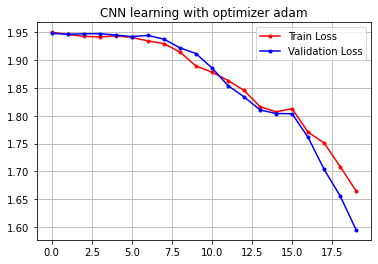

In [38]:
plt.plot(run_hist_model_2.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_model_2.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with optimizer adam")
plt.legend()
plt.grid()

<Figure size 432x288 with 0 Axes>

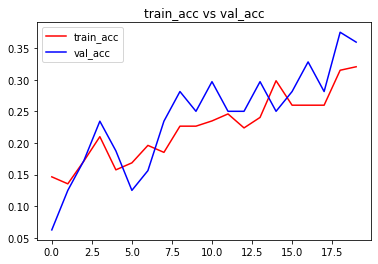

<Figure size 432x288 with 0 Axes>

In [39]:
train_acc=run_hist_model_2.history['accuracy']
val_acc=run_hist_model_2.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [40]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.5952210426330566
Test accuracy: 0.359375


# Best Model

# optimalizer = sgd

In [41]:
#initialize Sequential neural network
model_SGD = Sequential()
model_SGD.add(Convolution2D(6, (5, 5), input_shape=input_shape, padding='same'))
model_SGD.add(Activation('relu'))
model_SGD.add(MaxPooling2D(pool_size=(2, 2)))

model_SGD.add(Convolution2D(16, (5, 5), padding='same'))
model_SGD.add(Activation('relu'))
model_SGD.add(MaxPooling2D(pool_size=(2, 2)))

model_SGD.add(Convolution2D(120, (5, 5)))
model_SGD.add(Activation('relu'))
model_SGD.add(Dropout(0.25))
#After convolution blocks we need feed-forward network to perform classyfication
model_SGD.add(Flatten())
model_SGD.add(Dense(84))
model_SGD.add(Activation('relu'))
model_SGD.add(Dropout(0.5))
model_SGD.add(Dense(num_classes))
model_SGD.add(Activation('softmax'))

#sumarize 
model_SGD.summary()
model_SGD.get_config()
model_SGD.layers[0].get_config()
model_SGD.layers[0].input_shape
model_SGD.layers[0].output_shape
model_SGD.layers[0].get_weights()
np.shape(model_SGD.layers[0].get_weights()[0])
model_SGD.layers[0].trainable

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 6)       456       
_________________________________________________________________
activation_7 (Activation)    (None, 128, 128, 6)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        2416      
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 120)      

True

In [42]:
model_SGD.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=["accuracy"])

In [43]:
batch_size = 7
epochs = 30
run_hist_model_3 = model_SGD.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_test, y_test), callbacks=callbacks_list) #verbose = 0: no verbose; 1: progress barr; 2: summary afer epch

Epoch 1/30
52/52 [==============================] - 8s 121ms/step - loss: 1.9464 - accuracy: 0.1514 - val_loss: 1.9440 - val_accuracy: 0.1562
Epoch 2/30
52/52 [==============================] - 6s 124ms/step - loss: 1.9353 - accuracy: 0.2045 - val_loss: 1.9364 - val_accuracy: 0.1562
Epoch 3/30
52/52 [==============================] - 5s 94ms/step - loss: 1.9218 - accuracy: 0.2176 - val_loss: 1.9102 - val_accuracy: 0.3125
Epoch 4/30
52/52 [==============================] - 5s 90ms/step - loss: 1.8895 - accuracy: 0.3230 - val_loss: 1.8474 - val_accuracy: 0.2344
Epoch 5/30
52/52 [==============================] - 5s 93ms/step - loss: 1.8409 - accuracy: 0.2756 - val_loss: 1.7256 - val_accuracy: 0.3281
Epoch 6/30
52/52 [==============================] - 5s 92ms/step - loss: 1.7342 - accuracy: 0.2997 - val_loss: 1.5767 - val_accuracy: 0.3906
Epoch 7/30
52/52 [==============================] - 5s 90ms/step - loss: 1.5395 - accuracy: 0.4162 - val_loss: 1.4359 - val_accuracy: 0.4844
Epoch 8/30


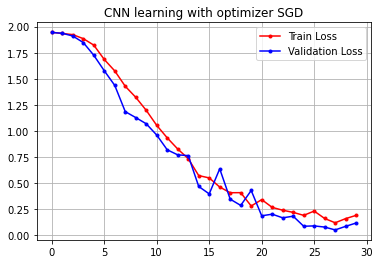

In [44]:
plt.plot(run_hist_model_3.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_model_3.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with optimizer SGD")
plt.legend()
plt.grid()

<Figure size 432x288 with 0 Axes>

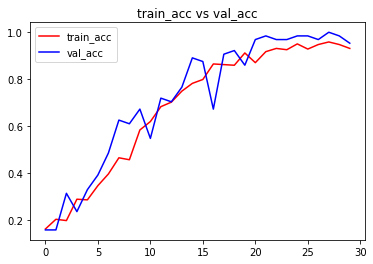

<Figure size 432x288 with 0 Axes>

In [45]:
train_acc=run_hist_model_3.history['accuracy']
val_acc=run_hist_model_3.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [46]:
# Evaluating the model
score = model_SGD.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.11497816443443298
Test accuracy: 0.953125


# optimalizer = Nadam

In [47]:
#initialize Sequential neural network
model_Nadam = Sequential()
model_Nadam.add(Convolution2D(6, (5, 5), input_shape=input_shape, padding='same'))
model_Nadam.add(Activation('relu'))
model_Nadam.add(MaxPooling2D(pool_size=(2, 2)))

model_Nadam.add(Convolution2D(16, (5, 5), padding='same'))
model_Nadam.add(Activation('relu'))
model_Nadam.add(MaxPooling2D(pool_size=(2, 2)))

model_Nadam.add(Convolution2D(120, (5, 5)))
model_Nadam.add(Activation('relu'))
model_Nadam.add(Dropout(0.25))
#After convolution blocks we need feed-forward network to perform classyfication
model_Nadam.add(Flatten())
model_Nadam.add(Dense(84))
model_Nadam.add(Activation('relu'))
model_Nadam.add(Dropout(0.5))
model_Nadam.add(Dense(num_classes))
model_Nadam.add(Activation('softmax'))

#sumarize 
model_Nadam.summary()
model_Nadam.get_config()
model_Nadam.layers[0].get_config()
model_Nadam.layers[0].input_shape
model_Nadam.layers[0].output_shape
model_Nadam.layers[0].get_weights()
np.shape(model_Nadam.layers[0].get_weights()[0])
model_Nadam.layers[0].trainable

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 6)       456       
_________________________________________________________________
activation_12 (Activation)   (None, 128, 128, 6)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 16)        2416      
_________________________________________________________________
activation_13 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 120)      

True

In [48]:
model_Nadam.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=["accuracy"])

In [49]:
batch_size = 7
epochs = 30
run_hist_model_4 = model_Nadam.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_test, y_test), callbacks=callbacks_list) #verbose = 0: no verbose; 1: progress barr; 2: summary afer epch

Epoch 1/30
52/52 [==============================] - 12s 183ms/step - loss: 2.1910 - accuracy: 0.1988 - val_loss: 1.9393 - val_accuracy: 0.2500
Epoch 2/30
52/52 [==============================] - 9s 175ms/step - loss: 1.9332 - accuracy: 0.2304 - val_loss: 1.8357 - val_accuracy: 0.2812
Epoch 3/30
52/52 [==============================] - 8s 162ms/step - loss: 1.7488 - accuracy: 0.2944 - val_loss: 1.4656 - val_accuracy: 0.3906
Epoch 4/30
52/52 [==============================] - 8s 149ms/step - loss: 1.4054 - accuracy: 0.4687 - val_loss: 1.0567 - val_accuracy: 0.5625
Epoch 5/30
52/52 [==============================] - 9s 180ms/step - loss: 1.2183 - accuracy: 0.5317 - val_loss: 0.8580 - val_accuracy: 0.7344
Epoch 6/30
52/52 [==============================] - 9s 164ms/step - loss: 0.8260 - accuracy: 0.7019 - val_loss: 0.6462 - val_accuracy: 0.7500
Epoch 7/30
52/52 [==============================] - 9s 165ms/step - loss: 0.6169 - accuracy: 0.7732 - val_loss: 0.3947 - val_accuracy: 0.8125
Epoch

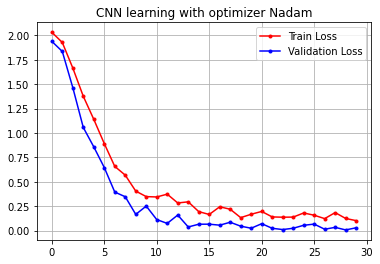

In [50]:
plt.plot(run_hist_model_4.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_model_4.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with optimizer Nadam")
plt.legend()
plt.grid()

<Figure size 432x288 with 0 Axes>

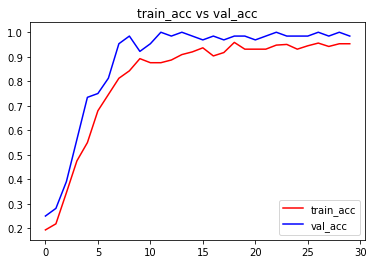

<Figure size 432x288 with 0 Axes>

In [51]:
train_acc=run_hist_model_4.history['accuracy']
val_acc=run_hist_model_4.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [52]:
# Evaluating the model
score = model_Nadam.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.028660833835601807
Test accuracy: 0.984375


# optimalizer = adam

In [53]:
#initialize Sequential neural network
model_Adam = Sequential()
model_Adam.add(Convolution2D(6, (5, 5), input_shape=input_shape, padding='same'))
model_Adam.add(Activation('relu'))
model_Adam.add(MaxPooling2D(pool_size=(2, 2)))

model_Adam.add(Convolution2D(16, (5, 5), padding='same'))
model_Adam.add(Activation('relu'))
model_Adam.add(MaxPooling2D(pool_size=(2, 2)))

model_Adam.add(Convolution2D(120, (5, 5)))
model_Adam.add(Activation('relu'))
model_Adam.add(Dropout(0.25))
#After convolution blocks we need feed-forward network to perform classyfication
model_Adam.add(Flatten())
model_Adam.add(Dense(84))
model_Adam.add(Activation('relu'))
model_Adam.add(Dropout(0.5))
model_Adam.add(Dense(num_classes))
model_Adam.add(Activation('softmax'))

#sumarize 
model_Adam.summary()
model_Adam.get_config()
model_Adam.layers[0].get_config()
model_Adam.layers[0].input_shape
model_Adam.layers[0].output_shape
model_Adam.layers[0].get_weights()
np.shape(model_Adam.layers[0].get_weights()[0])
model_Adam.layers[0].trainable

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 128, 6)       456       
_________________________________________________________________
activation_17 (Activation)   (None, 128, 128, 6)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 16)        2416      
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 120)      

True

In [54]:
model_Adam.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [55]:
batch_size = 7
epochs = 30
run_hist_model_5 = model_Adam.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_test, y_test), callbacks=callbacks_list) #verbose = 0: no verbose; 1: progress barr; 2: summary afer epch

Epoch 1/30
52/52 [==============================] - 10s 144ms/step - loss: 2.0548 - accuracy: 0.1131 - val_loss: 1.9445 - val_accuracy: 0.1875
Epoch 2/30
52/52 [==============================] - 7s 132ms/step - loss: 1.9359 - accuracy: 0.2275 - val_loss: 1.8818 - val_accuracy: 0.2812
Epoch 3/30
52/52 [==============================] - 5s 102ms/step - loss: 1.7940 - accuracy: 0.2905 - val_loss: 1.6012 - val_accuracy: 0.4062
Epoch 4/30
52/52 [==============================] - 5s 102ms/step - loss: 1.4945 - accuracy: 0.3973 - val_loss: 1.1196 - val_accuracy: 0.6875
Epoch 5/30
52/52 [==============================] - 5s 104ms/step - loss: 1.1100 - accuracy: 0.5929 - val_loss: 0.9281 - val_accuracy: 0.7656
Epoch 6/30
52/52 [==============================] - 5s 102ms/step - loss: 0.8929 - accuracy: 0.6449 - val_loss: 0.5952 - val_accuracy: 0.8125
Epoch 7/30
52/52 [==============================] - 6s 121ms/step - loss: 0.7699 - accuracy: 0.7281 - val_loss: 0.3734 - val_accuracy: 0.9219
Epoch

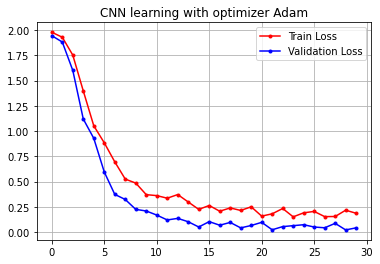

In [56]:
plt.plot(run_hist_model_5.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_model_5.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with optimizer Adam")
plt.legend()
plt.grid()

<Figure size 432x288 with 0 Axes>

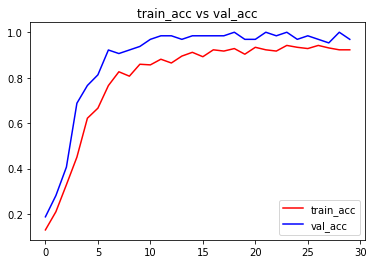

<Figure size 432x288 with 0 Axes>

In [57]:
train_acc=run_hist_model_5.history['accuracy']
val_acc=run_hist_model_5.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [58]:
# Evaluating the model
score = model_Adam.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.04204704612493515
Test accuracy: 0.96875


# Saving and testing on best model

In [59]:
#save trained model
model_Adam.save('convolution_neural_network_best.h5')

#to load saved model into memory
#from keras.models import load_model
#model = load_model('my-convNN-model.h5')

In [60]:
print(model_Adam.predict_classes(X_train))

/home/rgegotek/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 6 5 2 1 3 3 4 5 2 0 0 3 1 2 3 5 3 1 6 5 4 3 1 3 3 0 6 3 2 4 4 1 1 6 6 5
 3 3 1 1 6 1 5 6 1 0 3 1 1 2 5 0 5 5 5 6 2 6 1 5 3 6 0 5 4 4 3 1 4 4 0 4 1
 0 6 4 3 6 2 5 0 3 0 3 2 4 0 1 6 2 0 5 6 1 4 4 2 4 5 1 6 6 2 5 1 2 0 3 0 4
 6 4 6 5 0 2 0 2 5 3 4 1 3 4 6 1 4 6 5 6 2 2 6 1 1 6 5 1 2 3 6 5 4 2 0 4 0
 4 4 2 1 5 4 5 5 1 6 4 1 0 2 2 4 1 4 2 6 6 6 6 4 1 1 1 5 5 2 2 5 5 0 3 2 1
 3 0 6 3 1 4 1 4 0 3 2 0 0 5 2 0 5 3 1 4 3 4 4 0 1 6 3 1 4 5 3 4 1 2 6 0 6
 5 1 5 3 6 2 6 6 5 6 5 5 3 6 3 2 6 3 0 3 2 5 0 3 5 1 4 3 1 5 0 4 1 4 4 1 3
 1 5 6 5 6 3 1 2 0 2 4 2 0 4 2 0 3 4 5 2 5 3 5 1 0 2 6 0 4 1 2 2 1 3 2 6 5
 2 1 5 6 0 0 4 1 3 3 5 1 2 5 2 2 1 6 1 0 1 5 5 6 2 0 2 0 2 3 6 3 0 2 0 2 5
 2 1 1 1 2 0 2 6 0 4 0 2 4 3 2 1 3 1 4 3 0 4 4 6 0 2 6 6 1]


In [61]:
test_image = X_test[2:3]
print (test_image.shape)

print(model_Adam.predict(test_image))
#to get class predictions
print(model_Adam.predict_classes(test_image))
print(y_test[2:3])

(1, 128, 128, 3)
[[1.4826814e-07 2.1598466e-06 1.3981557e-06 9.9931431e-01 2.6570267e-06
  3.3940553e-06 6.7600509e-04]]
[3]
[[0. 0. 0. 1. 0. 0. 0.]]


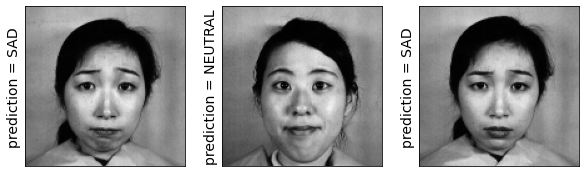

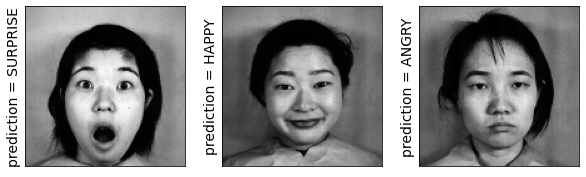

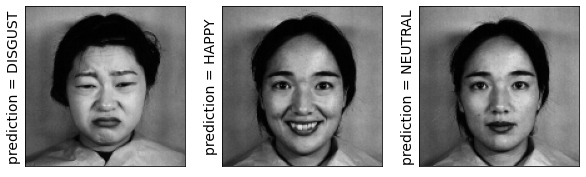

In [63]:
test_image = X_test[0:1]

for j in range(0, 3):
    res = model_Adam.predict_classes(X_test[0+(j*3):3+(j*3)])
    plt.figure(figsize=(10, 10))

    for i in range(0, 3):
        plt.subplot(330 + 1 + i)
        # tu uzywamy nasze metody do zamiany id emocji na nazwy 
        plt.ylabel('prediction = %s' % getLabel(res[i] ) , fontsize=14)
        plt.imshow(X_test[i+(j*3)],cmap=plt.get_cmap('gray'))
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])
    
# show the plot
plt.show()

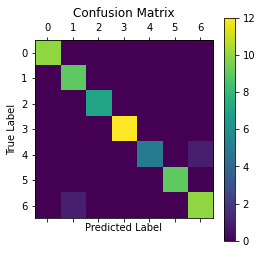

In [64]:
from sklearn.metrics import confusion_matrix
results = model_Adam.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Conclusion

In the case of an ideal model, the matrix presented above would have one diagonal in color yellow, while all other cells would be purple. On the visible colored chart in the error matrix, it can be seen that the photos showing class number 0 (disgust) and 6 (neutral) are classified faultlessly. Pretty good model performance is also achieved for the emotions surprised and angry, where it is close to maximum effectiveness. On the other hand, the prepared model has the most problems with photos from class 4 (sad). 